In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 9

In [18]:
data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

### MAE

In [19]:
mae.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
2728,MAE,MAE 1,"Bahadori, Mohammad Yousef",FA07,213,119,63.2,79.3,3.96,3.27,2.87
2729,MAE,MAE 1,"Linden, Paul F.",FA07,213,119,63.2,79.3,3.96,3.27,2.87
2730,MAE,MAE 1,"Nagy, Geza",FA07,213,119,63.2,79.3,3.96,3.27,2.87
2731,MAE,MAE 101A,"Bahadori, Mohammad Yousef",FA14,55,25,96.0,96.0,6.42,3.13,2.36
2732,MAE,MAE 101A,"Bahadori, Mohammad Yousef",S112,50,13,92.3,84.6,9.58,3.23,2.69


In [20]:
unique_course = mae.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[mae['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[mae['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[mae['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[mae['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa

,FA,WI,SP,S1
MAE 105,2.971538,3.170000,2.995000,3.193333
MAE 130A,2.780833,3.095385,3.050000,3.073750
MAE 130B,2.280000,2.800000,3.047692,2.820000
MAE 131A,3.147500,2.768889,2.975000,3.330000
MAE 143A,2.660000,2.996429,2.730000,3.040000
MAE 150,2.829231,2.670000,2.854545,2.970000
MAE 20,2.966667,3.180000,3.460000,3.615000
MAE 8,3.180000,3.195000,3.173750,3.368000


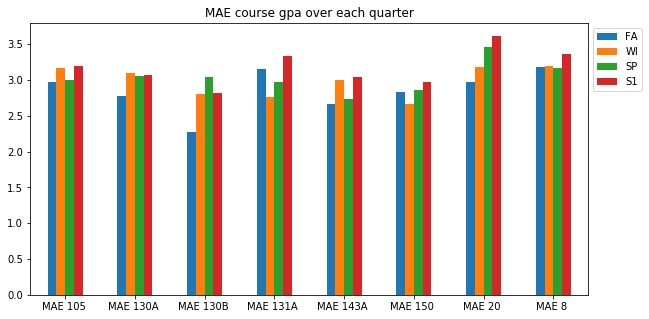

In [21]:
compare_gpa.plot.bar(rot = 0, figsize=(10,5), title='MAE course gpa over each quarter').legend(bbox_to_anchor=(1, 1))

### ECE

In [22]:
ece.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
1921,ECE,ECE 100,"Abd El-Messih, Andrew Saad",WI19,43,40,76.9,74.4,9.00,3.16,2.79
1922,ECE,ECE 100,"Coles, William A.",FA09,57,39,68.4,47.4,7.22,3.11,2.18
1923,ECE,ECE 100,"Cruz, Rene L",WI13,77,38,80.0,31.4,10.03,3.00,2.68
1924,ECE,ECE 100,"Kante, Boubacar",WI14,52,24,63.6,22.7,8.05,3.10,2.54
1925,ECE,ECE 100,"Kante, Boubacar",WI15,101,75,90.5,89.2,9.05,3.20,2.65


In [23]:
unique_course = ece.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[ece['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[ece['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[ece['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[ece['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa

,FA,WI,SP,S1
ECE 101,2.605833,2.615000,2.920000,2.606667
ECE 107,2.655000,2.511667,2.633846,2.840000
ECE 109,2.660000,2.423846,2.588333,2.530000
ECE 180,3.544286,3.562500,3.521429,3.695000
ECE 45,2.716667,2.937500,2.791818,3.280000
ECE 65,2.611667,2.562222,2.704545,2.680000


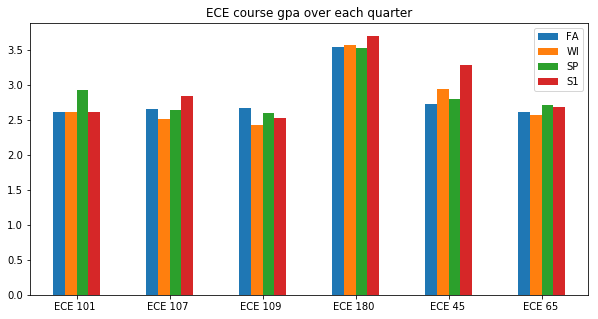

In [24]:
compare_gpa.plot.bar(rot = 0, figsize=(10,5), title='ECE course gpa over each quarter').legend(bbox_to_anchor=(1, 1))

### CSE

In [25]:
cse.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
447,CSE,CSE 100,"Alvarado, Christine J.",FA13,205,161,98.10,93.50,9.870,3.340,2.64
448,CSE,CSE 100,"Alvarado, Christine J.",FA16,321,292,97.40,96.55,11.460,3.510,3.19
449,CSE,CSE 100,"Alvarado, Christine J.",SP16,386,325,94.80,92.05,11.065,3.165,2.70
450,CSE,CSE 100,"Alvarado, Christine J.",WI15,196,139,96.40,94.90,12.500,3.140,2.51
451,CSE,CSE 100,"Alvarado, Christine J.",WI16,424,364,96.25,95.45,10.870,3.350,2.89


In [26]:
unique_course = cse.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[cse['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[cse['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[cse['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[cse['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa

,FA,WI,SP,S1
CSE 100,3.018750,2.890000,2.873333,2.935000
CSE 101,3.039375,3.032143,3.046471,3.078571
CSE 105,2.850769,2.572857,2.809231,2.740000
CSE 11,3.382857,2.992667,2.916667,2.890000
CSE 12,2.862000,3.018000,2.968947,2.894286
CSE 120,2.964286,2.958182,2.875000,2.855000
CSE 130,3.278333,3.135385,3.175000,3.220000
CSE 134B,3.005000,3.410000,3.000000,3.157778
CSE 140,3.020000,2.790000,2.861429,2.828000
CSE 140L,3.300000,3.239231,3.178667,3.130000


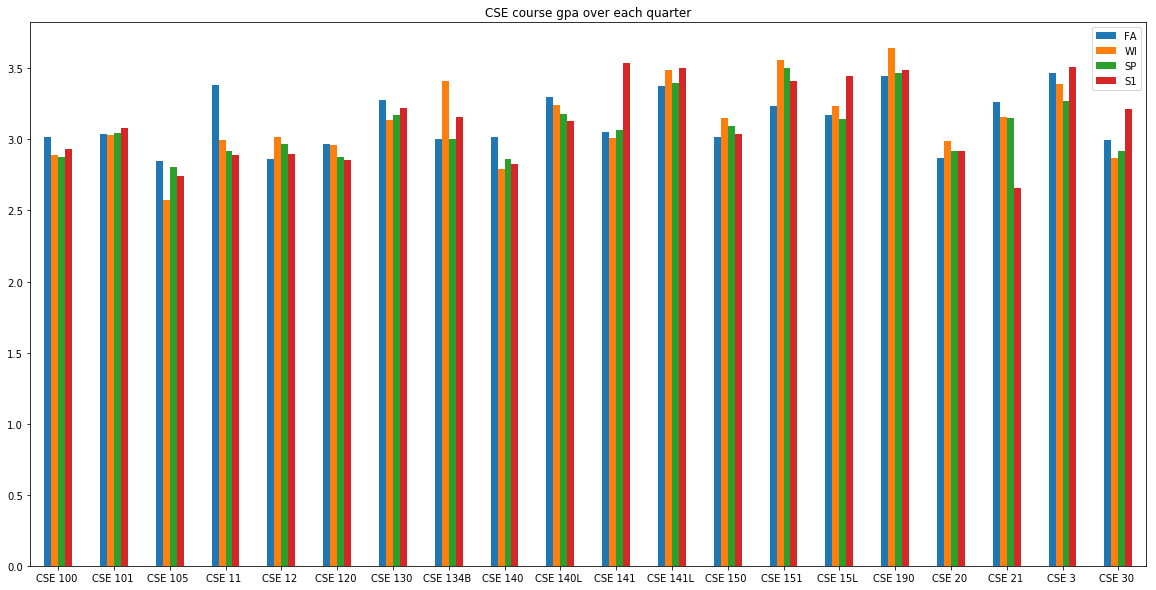

In [30]:
compare_gpa.plot.bar(rot = 0, figsize=(20,10), title='CSE course gpa over each quarter').legend(bbox_to_anchor=(1, 1))

### BENG

In [29]:
bio.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,BENG,BENG 100,"Abbasi, Shaghayegh",S119,30,9,66.7,100.0,7.39,3.11,2.70
1,BENG,BENG 100,"Alexandrov, Ludmil B",SP18,163,74,76.4,90.1,7.20,3.18,2.91
2,BENG,BENG 100,"Alexandrov, Ludmil B",SP19,174,80,60.0,80.0,7.38,3.14,2.87
3,BENG,BENG 100,"Coleman, Todd Prentice",SP13,152,61,70.7,74.1,9.69,3.04,3.25
4,BENG,BENG 100,"Coleman, Todd Prentice",SP14,137,42,70.7,82.9,9.47,3.10,3.06


In [31]:
unique_course = bio.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[bio['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[bio['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[bio['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[bio['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa

,FA,WI,SP,S1


There is no common courses that open in all four quarters